In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [5]:
df = pd.read_csv('Jungle.csv')
lane = df.drop(columns = ['Lane', 'Unnamed: 0', 'Summoner', 'Item_0', 'Item_1', 'Item_2', 'Item_3', 'Item_4', 'Item_5', 'Item_6'])

In [6]:
lane.head()

,Champion,Kills,Deaths,Assists,Killing_Spree,Multikills,Total_Damage,Damage_To_Objectives,Damage_To_Turrets,Damage_Taken,Gold_Earned,Champ_Level,Wards_Bought,Vision_Score,Crowd_Controls
0,59,4,8,12,0,1,9851,15310,233,28046,10180,13,5,41,18
1,106,5,3,11,2,1,11734,22331,4615,27243,12057,16,6,37,25
2,17,7,8,24,3,1,37916,28477,1443,31823,17018,18,2,26,47
3,498,2,3,3,2,1,15450,2111,1792,10890,9117,12,3,22,10
4,107,9,11,11,2,1,27099,28451,2799,44792,15719,17,3,64,15


In [7]:
lane.groupby('Champion').mean().head()

,Kills,Deaths,Assists,Killing_Spree,Multikills,Total_Damage,Damage_To_Objectives,Damage_To_Turrets,Damage_Taken,Gold_Earned,Champ_Level,Wards_Bought,Vision_Score,Crowd_Controls
Champion,,,,,,,,,,,,,,
1,2.888889,9.666667,3.666667,0.222222,1.111111,14835.888889,5789.222222,654.555556,23607.666667,9205.555556,13.111111,2.666667,23.222222,17.333333
2,7.046579,5.574964,7.246482,3.364871,1.636099,16344.132945,24935.363416,2154.700631,29796.164483,11770.613780,14.239204,4.352256,29.224648,12.737021
3,8.500000,3.000000,13.500000,4.500000,2.000000,24785.000000,8783.000000,5261.000000,17547.500000,12536.500000,15.000000,2.500000,24.500000,38.500000
4,5.459459,4.675676,5.972973,3.243243,1.270270,13758.243243,17116.081081,3253.000000,19493.135135,12091.594595,14.513514,3.918919,24.351351,29.216216
5,5.696923,6.123077,8.231538,2.636923,1.350769,14457.801538,20958.173846,2175.508462,29294.663077,10881.798462,13.919231,4.453077,31.487692,18.343077


In [8]:
model = KMeans(n_clusters = 4).fit(lane)

In [9]:
model.cluster_centers_

array([[1.21037155e+02, 4.20724227e+00, 5.48118660e+00, 6.20441142e+00,
        2.06782260e+00, 1.21614768e+00, 1.04644319e+04, 8.55838240e+03,
        8.90588405e+02, 2.17158995e+04, 8.98383557e+03, 1.25110285e+01,
        3.48820477e+00, 2.28997405e+01, 1.66356452e+01],
       [1.03547024e+02, 1.02444893e+01, 6.29720794e+00, 1.17678178e+01,
        4.53030860e+00, 1.79335048e+00, 2.62195108e+04, 3.53025077e+04,
        3.04375588e+03, 4.03418205e+04, 1.55063227e+04, 1.67994122e+01,
        4.52883909e+00, 3.75457384e+01, 2.42013226e+01],
       [1.04489385e+02, 6.53813493e+00, 3.82591602e+00, 8.84061959e+00,
        3.71418462e+00, 1.48804844e+00, 1.33848390e+04, 2.74598800e+04,
        2.38203098e+03, 2.39874427e+04, 1.12576852e+04, 1.40978928e+01,
        4.10693505e+00, 2.88329140e+01, 1.63701840e+01],
       [1.19605210e+02, 7.06246228e+00, 7.12733856e+00, 1.05311808e+01,
        3.06517803e+00, 1.47998391e+00, 1.90361208e+04, 1.51936746e+04,
        1.41044679e+03, 3.56402238e+0

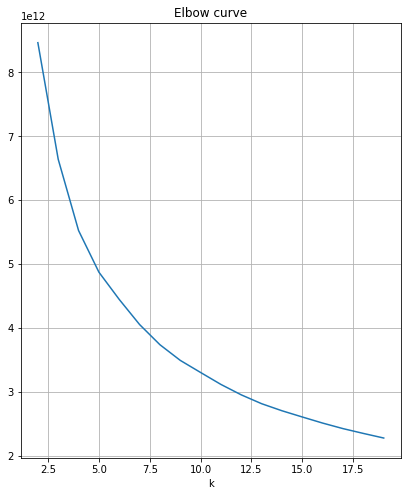

In [10]:
distorsions = []

for k in range(2,20):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(lane)
    distorsions.append(kmeans.inertia_)

# Plot values of SSE
plt.figure(figsize=(15,8))
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.plot(range(2, 20), distorsions)
plt.grid(True)

In [11]:
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(lane)
    silhouette_avg = metrics.silhouette_score(lane, cluster_labels)
    silhouette_plot.append(silhouette_avg)

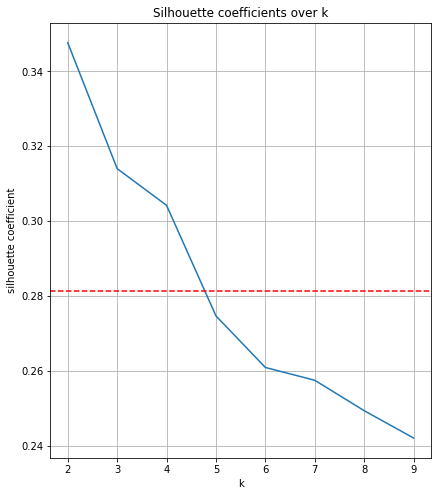

In [12]:
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

In [13]:
k_means = KMeans(n_clusters = 5).fit(lane.groupby('Champion').mean())
cluster_assignments = k_means.predict(lane.groupby('Champion').mean())

In [14]:
cluster_assignments

array([4, 2, 1, 1, 2, 1, 4, 0, 0, 2, 2, 4, 1, 0, 1, 4, 1, 1, 2, 2, 4, 1,
       2, 2, 4, 3, 4, 1, 1, 1, 0, 2, 4, 4, 2, 0, 3, 1, 0, 3, 1, 1, 4, 2,
       1, 2, 1, 1, 3, 4, 4, 2, 0, 0, 2, 2, 1, 1, 1, 2, 1, 1, 4, 2, 1, 0,
       2, 2, 2, 2, 4, 1, 0, 2, 4, 4, 4, 4, 4, 4, 1, 0, 3, 1, 2, 4, 2, 3,
       2, 2, 1, 4, 3, 2, 0, 3, 3, 1, 2, 2, 0, 1, 0, 1, 1, 1, 4, 2, 3, 1,
       1, 0, 0, 1, 1, 1, 2, 4, 1, 2, 1, 0, 1, 1, 0, 2, 4, 2, 2, 3, 1, 3,
       3, 0, 2, 3, 4, 3, 3, 1, 0, 0, 4, 4], dtype=int32)

In [15]:
clustered = lane.groupby('Champion').mean()

In [16]:
clustered['Cluster'] = cluster_assignments

In [17]:
clustered

,Kills,Deaths,Assists,Killing_Spree,Multikills,Total_Damage,Damage_To_Objectives,Damage_To_Turrets,Damage_Taken,Gold_Earned,Champ_Level,Wards_Bought,Vision_Score,Crowd_Controls,Cluster
Champion,,,,,,,,,,,,,,,
1,2.888889,9.666667,3.666667,0.222222,1.111111,14835.888889,5789.222222,654.555556,23607.666667,9205.555556,13.111111,2.666667,23.222222,17.333333,4
2,7.046579,5.574964,7.246482,3.364871,1.636099,16344.132945,24935.363416,2154.700631,29796.164483,11770.613780,14.239204,4.352256,29.224648,12.737021,2
3,8.500000,3.000000,13.500000,4.500000,2.000000,24785.000000,8783.000000,5261.000000,17547.500000,12536.500000,15.000000,2.500000,24.500000,38.500000,1
4,5.459459,4.675676,5.972973,3.243243,1.270270,13758.243243,17116.081081,3253.000000,19493.135135,12091.594595,14.513514,3.918919,24.351351,29.216216,1
5,5.696923,6.123077,8.231538,2.636923,1.350769,14457.801538,20958.173846,2175.508462,29294.663077,10881.798462,13.919231,4.453077,31.487692,18.343077,2
6,7.804878,5.219512,4.926829,4.219512,1.609756,19477.414634,16434.146341,2632.000000,24992.292683,12497.390244,15.073171,2.390244,24.048780,23.585366,1
7,5.800000,4.000000,7.400000,2.800000,1.200000,18103.600000,6052.000000,4111.200000,21075.400000,11375.600000,14.600000,3.600000,26.600000,14.400000,4
8,5.300000,6.600000,10.100000,1.800000,1.100000,23172.100000,2636.000000,1325.400000,30969.800000,10761.700000,15.100000,1.700000,15.100000,5.100000,0
9,5.945312,6.300781,8.984375,2.757812,1.433594,16601.332031,12001.382812,867.433594,27479.519531,10933.300781,14.089844,5.152344,28.328125,50.996094,0
